# Boston Data for Final Statistics Project (Data Science with Python)

In [4]:
import pandas as pd

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [60]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

## The data heads and description:

boston_df.head(10)

In [17]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**A boxplot for the "Median value of owner-occupied homes":**

Text(0.5, 1.0, 'Boxplot - the Median value of owner-occupied homes')

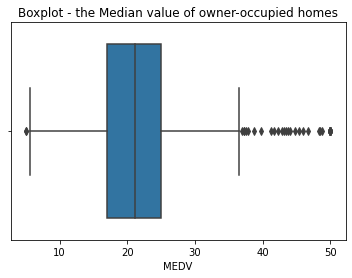

In [48]:
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.title("Boxplot - the Median value of owner-occupied homes")

**A histogram for the Charles river variable:**

Text(0.5, 1.0, 'Histogram - the Charles river variable')

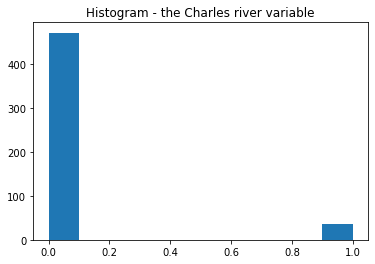

In [62]:
plt.hist(boston_df['CHAS'])
plt.title("Histogram - the Charles river variable")

**A boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older):**

[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, 'Median value of owner-occupied homes'),
 Text(0.5, 1.0, 'Boxplot - MEDV variable vs the AGE variable')]

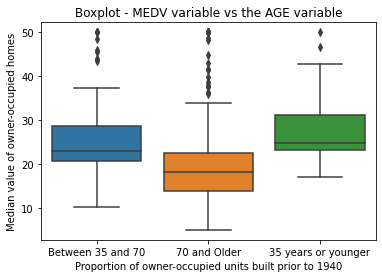

In [46]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 years or younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and Older"

agebox = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
agebox.set(xlabel = "Proportion of owner-occupied units built prior to 1940", 
           ylabel = "Median value of owner-occupied homes", 
           title = "Boxplot - MEDV variable vs the AGE variable")

**A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town:** 

Text(0.5, 1.0, 'Scatterplot - the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

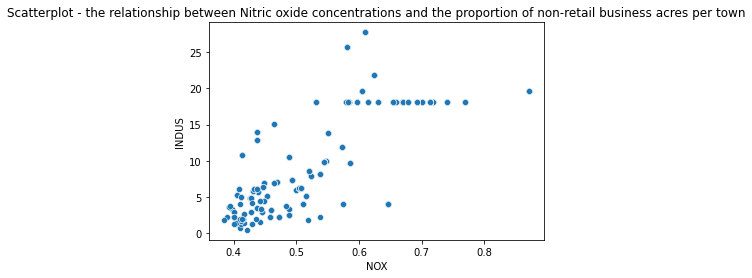

In [53]:
ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
plt.title("Scatterplot - the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

According to the plot as Nitric oxide concentrations are getting higher, more non-retail business acres per townare are found.

**A histogram for the pupil to teacher ratio variable:**

Text(0.5, 1.0, 'Histogram - pupil to teacher ratio variable')

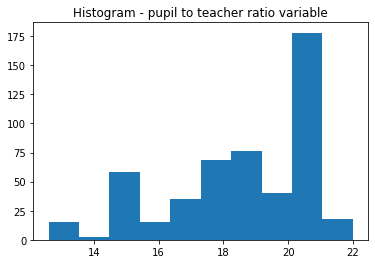

In [63]:
plt.hist(boston_df['PTRATIO'])
plt.title("Histogram - pupil to teacher ratio variable")

----------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

### Is there a significant difference in median value of houses bounded by the Charles river or not? 

𝐻_0:µ_1=µ_2  ("there is no difference in median value of houses bounded by the Charles river")

𝐻_1:µ_1≠µ_2  ("there is a difference in median value of houses bounded by the Charles river")

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

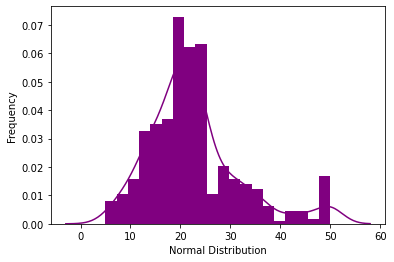

In [11]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='purple',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [44]:
X = boston_df['CHAS']
#CHAS - Charles River dummy variable (as 1 - if tract bounds river)
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           7.39e-05
Time:                        14:39:15   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: There is a difference in median value of houses bounded by the Charles river, as MEDV + 6 when the river is bound. 

###  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

𝐻_0:µ_1=µ_2=µ_3  ("the Median values for each poprportion are equal")

𝐻_1:At least one of the mean differ

Alpha<0.05

In [43]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Conclusion: There is a difference since P valus < 0.05

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

𝐻_0:There is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town

𝐻_1:Nitrite Oxide concentrations and proportion of non-retail business acres per town are correlated

Alpha<0.05

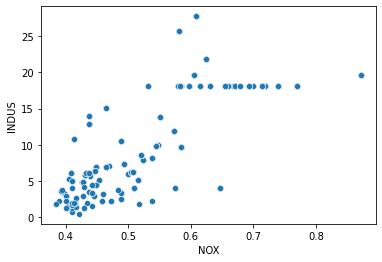

In [35]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [36]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Conclusion: Since the P value <0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [38]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

𝐻_0:µ_1=µ_2  ("there is no impact")

𝐻_1:Additional weighetd distance have an impact on the MEDV

Alpha<0.05

In [39]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ DIS', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq         F        PR(>F)
DIS         1.0   2668.246572  2668.246572  33.57957  1.206612e-08
Residual  504.0  40048.048843    79.460414       NaN           NaN


Conclusion: We will reject the null hypothesis since the p-value is less than 0.05 there is a significant evidence that there is an impact, as additional in weighted distance add +1.09 

##### Option 2:

In [41]:
X = pd.get_dummies(boston_df[['DIS']])

In [42]:
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        14:18:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""